(429, 640, 3)
(3, 3, 1, 1)


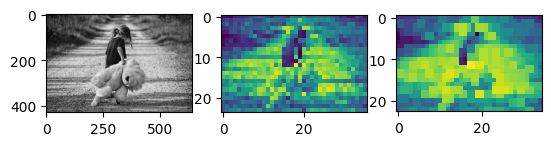

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

fig  = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
ori_img = img.imread('girl.jpg')

ax1.imshow(ori_img)
print(ori_img.shape)

#convolution -> API
#API -> 4차원을 입력 받는다 (이미지개수, 세로, 가로, 채널)
#(429,640,3)우리의 이미지 -> (1,429,640, 3)

input_image = ori_img.reshape((1,)+ori_img.shape)
input_image = input_image.astype(np.float32)
ch1_input_img = input_image[:,:,:,0:1]

# filter = np.array([[[[1]],[[0]],[[1]]],
#                    [[[1]],[[0]],[[1]]],
#                    [[[1]],[[0]],[[1]]]])

filter = np.array([[1/9,1/9,1/9],
                   [1/9,1/9,1/9],
                   [1/9,1/9,1/9]])

filter = filter.reshape((3,3,1,1))
print(filter.shape)

conv2d = tf.nn.conv2d(
    ch1_input_img,
    filter,
    strides = [1,18,18,1],
    padding='VALID' #패딩고려 안함, 디폴트값
)

conv2d_result = conv2d.numpy()


t_img = conv2d_result[0,:,:,:]
ax2.imshow(t_img)

#pooling 
pool =  tf.nn.max_pool(
    conv2d_result,
    ksize=[1,2,2,1],
    strides=[1,1,1,1],
    padding='VALID'
)

pool_result = pool.numpy()
t_img = pool_result[0,:,:,:]
ax3.imshow(t_img)

**케라스(Keras)란?**

케라스는 딥러닝 모델을 쉽게 구축하고 훈련시키기 위한 고수준 신경망 API입니다. François Chollet이 개발한 이 라이브러리는 모듈화되고 간결한 디자인을 가지고 있으며, 특히 초보자와 전문가 모두에게 사용하기 쉬운 인터페이스를 제공합니다. 케라스는 사용자가 쉽게 신경망을 설계하고 실험할 수 있도록 도와주며, TensorFlow, Theano, 그리고 Microsoft Cognitive Toolkit 등과 같은 다양한 백엔드 엔진에서 실행될 수 있습니다.

TensorFlow 2.0 이후부터는 케라스가 TensorFlow의 공식 고수준 API로 통합되었으며, 이를 통해 사용자는 TensorFlow에서 제공하는 강력한 기능을 그대로 활용하면서도 케라스의 편리한 인터페이스를 사용할 수 있게 되었습니다.

케라스는 컨볼루션 신경망(CNN), 순환 신경망(RNN), 그리고 다양한 종류의 신경망을 쉽게 구현할 수 있도록 다양한 층(layer)과 모델(model) 클래스를 제공합니다. 또한, 다양한 최적화 알고리즘, 손실 함수, 메트릭스 등을 지원하여 모델의 훈련 및 평가를 쉽게 수행할 수 있습니다.


Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)
[0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.]


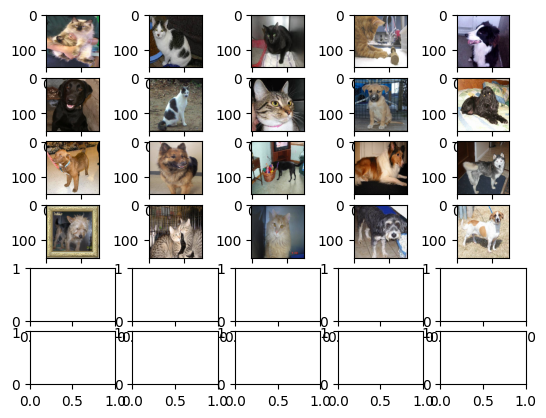

In [5]:
#ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = './cat_dog_small/train'
validation_dir = './cat_dog_small/validation'

#생성
train_datagen = ImageDataGenerator(rescale = 1/255) #0-1까지 정규환
validation_datagen = ImageDataGenerator(rescale = 1/255)

#설정
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes = ['cats','dogs'], #클래스 지정, 타켓, 레이블
    target_size = (150,150),
    batch_size = 20, 
    class_mode = 'binary' 
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes = ['cats','dogs'], #클래스 지정, 타켓, 레이블
    target_size = (150,150),
    batch_size = 20, 
    class_mode = 'binary' 
)
#generator 동작 확인 

#한번에 20개 이미지를 가져와서 
fig = plt.figure()
axs = []

for i in range(30):
    axs.append(fig.add_subplot(6,5,i+1))
    
for data_batch,label_batch in train_generator:
    print(data_batch.shape)

    
    for idx,img_data in enumerate(data_batch):
        axs[idx].imshow(img_data)
        
    print(label_batch.shape)
    print(label_batch)    
    
    break


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential # model, box
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

#1. model 생성
model = Sequential()

#2. model layer 추가

################ 1 #################
model.add(Conv2D(
    filters=32,
    kernel_size = (3,3),
    strides = (1,1),
    padding = 'valid',
    activation='relu',
    input_shape=(150,150,3)
))

model.add(MaxPool2D(
    pool_size = (2,2)
))

################ 2 #################
model.add(Conv2D(
    filters=64,
    kernel_size = (3,3),
    strides = (1,1),
    padding = 'valid',
    activation='relu'
))

model.add(MaxPool2D(
    pool_size = (2,2)
))

################ 3 #################
model.add(Conv2D(
    filters= 512,
    kernel_size = (3,3),
    strides = (1,1),
    padding = 'valid',
    activation='relu'
))

model.add(MaxPool2D(
    pool_size = (2,2)
))


#3. model flatten
model.add(Flatten())

model.add(Dense(
    units = 1,
    activation='sigmoid'
))

model.summary()

model.compile(
    optimizer=Adam(learning_rate = 0.001),
    loss='binary_crossentropy',
    metrics = ['acc']
)

model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 10,
    verbose = 1
)






Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 512)       295424    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 512)      